# TechLab - Portfolio Optimization Pt.1

Nel primo laboratorio prenderemo confidenza con l’ambiente di laboratorio Jupyter, impareremo ad ottenere le quotazioni giornaliere di mercato e calcolremo valori attesi dei rendimenti e varianze annualizzate.

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy.stats as stats
import math
from pypfopt import expected_returns

In [2]:
# Scelgo gli asset su cui effettuare l'analisi

assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Scarico i prezzi di mercato degli asset

stockStartDate = '2015-01-01'
stockEndDate = '2020-12-31'
# today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = stockEndDate)['Adj Close']

df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,24.861401,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.161013,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.163294,46.501431,500.585632
2015-01-07,76.150002,298.420013,24.502111,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.443539,47.779999,501.303680
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.773087,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,136.486053,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.668762,530.869995,1758.719971


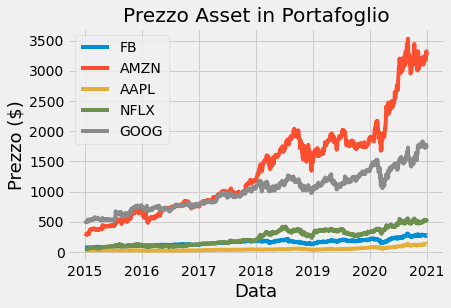

In [4]:
# Visualizzo l'andamento dei prezzi degli asset scelti

title = 'Prezzo Asset in Portafoglio'
my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label =c)

plt.title(title)
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Prezzo ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [5]:
# In luogo dei prezzi, utilizziamo i simple returns

returns = expected_returns.returns_from_prices(df).dropna()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
2015-01-09,-0.005628,-0.011749,0.001072,-0.015458,-0.012951
...,...,...,...,...,...
2020-12-24,-0.002648,-0.003949,0.007712,-0.000991,0.003735
2020-12-28,0.035901,0.035071,0.035766,0.010020,0.021416
2020-12-29,-0.000794,0.011584,-0.013315,0.022634,-0.009780


In [6]:
# Calcolo il valore atteso annualizzato del rendimento degli asset

mu_v = returns.mean()*252
mu_v

FB      0.259325
AMZN    0.441122
AAPL    0.323324
NFLX    0.487253
GOOG    0.237748
dtype: float64

In [7]:
# Calcolo la varianza annualizzata del rendimento degli asset

var_v = returns.var()*252
var_v

FB      0.101473
AMZN    0.096014
AAPL    0.087807
NFLX    0.180231
GOOG    0.072494
dtype: float64

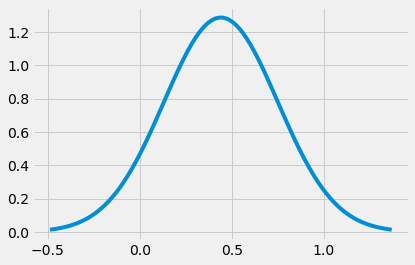

In [8]:
mu = mu_v.loc['AMZN']
variance = var_v.loc['AMZN']

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()